Felipe Veloso hito 4

In [1]:
import warnings
warnings.filterwarnings('ignore')
#Librerias para filtrar warnings
import pandas as pd
import numpy as np
#Libreria de analisis numerico
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)
#librerias de graficos
from scipy import stats
#Librerias estadisticas
import statsmodels.api as sm
import statsmodels.formula.api as smf
#librerias de estadsitica aplicada

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
#Librerias espeficias para regresion logistica, su validadion, presicion y evaluar su eficacia.
#Pueden faltar librerias para temas mas especificos y al a vez librerias util que permitan funciones adicionales
from functions import printUniques , replaceAll , concise_summary,logitCalculate

# La preparación del ambiente de trabajo (imports, separación de muestras) para implementar modelos de predicción. 

In [2]:
df = pd.read_csv('income-db.csv')
df_filter = df

In [3]:
df_filter = replaceAll(df_filter,'?',np.nan)
df_filter = replaceAll(df_filter,['Exec-managerial','Prof-specialty','Adm-clerical','Sales','Tech-support'],'white_collar')
df_filter = replaceAll(df_filter,['Craft-repair','Machine-op-inspct','Transport-moving','Handlers-cleaners','Farming-fishing','Protective-serv','Priv-house-serv'],'blue_collar')
df_filter = replaceAll(df_filter,['Other-service','Armed-Forces'],'others')
df_filter = replaceAll(df_filter,['Federal-gov'],'federal_gov')
df_filter = replaceAll(df_filter,['State-gov','Local-gov'],'state_level_gov' )
df_filter = replaceAll(df_filter,['Self-emp-inc','Self-emp-not-inc'],'self_employ' )
df_filter = replaceAll(df_filter,['Never-worked','Without-pay'],'unemployed' )
df_filter = replaceAll(df_filter,['Preschool'],'preschool')
df_filter = replaceAll(df_filter,['1st-4th','5th-6th'],'elementary_school')
df_filter = replaceAll(df_filter,['7th-8th','9th','10th','11th','12th','HS-grad'],'high_school')
df_filter = replaceAll(df_filter,['Assoc-voc','Assoc-acdm','Some-college'],'college')
df_filter = replaceAll(df_filter,['Bachelors','Masters','Prof-school','Doctorate'],'university')
df_filter = replaceAll(df_filter,['Married-civ-spouse','Married-spouse-absent','Married-AF- spouse'],'married')
df_filter = replaceAll(df_filter,['Divorced'],'divorced')
df_filter = replaceAll(df_filter,['Separated'],'separated')
df_filter = replaceAll(df_filter,['Widowed'],'widowed')
df_filter = replaceAll(df_filter,['United-States','Mexico','Puerto-Rico','Canada','El-Salvador','Cuba','Jamaica','Dominican-Republic','Guatemala','Columbia','Haiti','Nicaragua','Peru','Ecuador','Trinadad&Tobago','Outlying-US(Guam-USVI-etc)','Honduras'],'America')
df_filter = replaceAll(df_filter,['England','Portugal','Italy','Germany','Poland','Greece','Ireland','France','Scotland','Yugoslavia','Hungary','Holand-Netherlands'],'Europe')
df_filter = replaceAll(df_filter,['Philippines','India','China','Japan','South','Vietnam','Iran','Taiwan','Thailand','Hong','Cambodia','Laos'],'Asia')
df_filter = replaceAll(df_filter,['<=50K','>50K'], [0,1])
df_filter = replaceAll(df_filter,'-','_')


In [4]:
df_filter['collars'] = df_filter['occupation']
df_filter = df_filter.drop('occupation', axis=1)
df_filter['workclass_recod'] = df_filter['workclass']
df_filter = df_filter.drop('workclass', axis=1)
df_filter['education_recod'] = df_filter['education']
df_filter = df_filter.drop('education', axis=1)
df_filter['civstatus'] = df_filter['marital-status']
df_filter = df_filter.drop('marital-status', axis=1)

In [5]:
df_dummy = pd.get_dummies(df_filter)

In [6]:
df_dummy = df_dummy.rename(index=str, columns={'capital-gain':'capital_gain',
                                               'capital-loss':'capital_loss',
                                               'educational-num':'educational_num',
                                               'hours-per-week':'hours_per_week',
                                               'relationship_Not-in-family':'relationship_Not_in_family',
                                              'relationship_Other-relative':'relationship_Other_relative',
                                              'relationship_Own-child':'relationship_Own_child',
                                              'race_Amer-Indian-Eskimo':'race_Amer_Indian_Eskimo',
                                              'race_Asian-Pac-Islander':'race_Asian_Pac_Islander',
                                              'native-country_America':'native_country_America',
                                              'native-country_Asia':'native_country_Asia',
                                              'native-country_Europe':'native_country_Europe',
                                              'civstatus_Married-AF-spouse':'civstatus_Married_AF_spouse',
                                              'civstatus_Never-married':'civstatus_Never_married'})

In [7]:
df_dummy.dropna(how='any' , inplace=True)

In [8]:
#logit_reg = smf.logit('income ~ age + fnlwgt + educational_num + capital_gain + capital_loss + hours_per_week + relationship_Husband + relationship_Other_relative + relationship_Own_child  + relationship_Unmarried + relationship_Wife + race_Amer_Indian_Eskimo + race_Asian_Pac_Islander + race_Black + race_White + gender_Male + native_country_America + native_country_Europe + collars_blue_collar + collars_white_collar + workclass_recod_Private + workclass_recod_federal_gov + workclass_recod_self_employ + workclass_recod_state_level_gov + education_recod_college + education_recod_elementary_school + education_recod_high_school + education_recod_university + civstatus_Married_AF_spouse + civstatus_Never_married + civstatus_divorced + civstatus_married + civstatus_separated', df_dummy).fit()
#params =  ['age','fnlwgt','educational_num','capital_gain','capital_loss','hours_per_week','relationship_Husband','relationship_Other_relative','relationship_Own_child','relationship_Unmarried','relationship_Wife','gender_Male','native_country_America','native_country_Europe','collars_blue_collar','collars_white_collar','workclass_recod_federal_gov','workclass_recod_self_employ','civstatus_Married_AF_spouse','civstatus_Never_married','civstatus_married']


# La implementación de por lo menos tres modelos predictivos. 

In [9]:
df_Y = df_dummy['income']

In [10]:
params =  ['age','fnlwgt','educational_num','capital_gain','capital_loss','hours_per_week','relationship_Husband','relationship_Other_relative','relationship_Own_child','relationship_Unmarried','relationship_Wife','gender_Male','native_country_America','native_country_Europe','collars_blue_collar','collars_white_collar','workclass_recod_federal_gov','workclass_recod_self_employ','civstatus_Married_AF_spouse','civstatus_Never_married','civstatus_married']
df_fin = df_dummy.loc[:,params]

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Utilizare los size segun pareto
X_train , X_test , y_train , y_test = train_test_split(df_fin,
                                                       df_Y,
                                                       test_size=.2,random_state=11238)

In [12]:
#Modelo sin estandarizar todos los params

In [13]:
default_model = LogisticRegression().fit(X_train,y_train)

In [14]:
def_predict = default_model.predict(X_test)
def_predict[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,def_predict))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7442
           1       0.73      0.26      0.39      2327

   micro avg       0.80      0.80      0.80      9769
   macro avg       0.77      0.62      0.63      9769
weighted avg       0.79      0.80      0.76      9769



Modelo Predice `73%` frente a un predictor aleatorio y un `26%` de positivos reales

In [16]:
from sklearn.metrics import roc_curve
def_predict_pr = default_model.predict_proba(X_test)[:,1]

false_positive, true_positive, threshold = roc_curve(y_test,def_predict_pr)

Text(0.5, 0, 'Falsos Positivos')

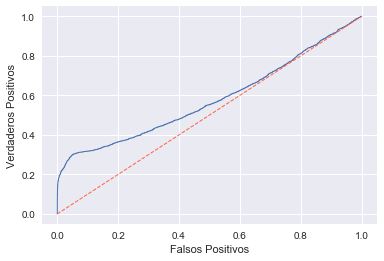

In [17]:
plt.plot(false_positive,true_positive,lw=1)
plt.plot([0,1], linestyle='--', lw=1, color = 'tomato')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
#curva roc

In [18]:
#Modelo Standarizado

In [19]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
normal_model = LogisticRegression().fit(X_train_std,y_train)

In [42]:
y_std = normal_model.predict(X_test_std)
y_std[:20]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_std))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7442
           1       0.72      0.59      0.65      2327

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



Modelo Predice `72%` frente a un predictor aleatorio y un `59%` de positivos reales

In [44]:
from sklearn.metrics import roc_curve
y_std_pr = normal_model.predict_proba(X_test_std)[:,1]

false_positive, true_positive, threshold = roc_curve(y_test,y_std_pr)

Text(0.5, 0, 'Falsos Positivos')

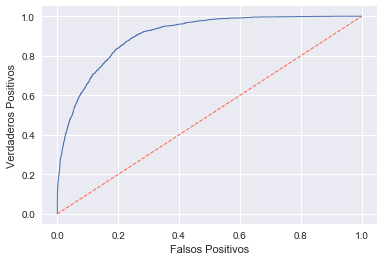

In [24]:
plt.plot(false_positive,true_positive,lw=1)
plt.plot([0,1], linestyle='--', lw=1, color = 'tomato')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
#curva roc

In [25]:
# Modelo con los datos que personalmente creo que influyen

In [26]:
df_Y_mine = df_dummy['income']
params =  ['age','educational_num','capital_gain','capital_loss','hours_per_week','gender_Male','native_country_America','native_country_Europe','collars_blue_collar','collars_white_collar','workclass_recod_federal_gov','workclass_recod_self_employ','civstatus_Married_AF_spouse','civstatus_Never_married','civstatus_married']
df_fin_mine = df_dummy.loc[:,params]

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Utilizare los size segun pareto
X_train_mine , X_test_mine , y_train_mine , y_test_mine = train_test_split(df_fin_mine,
                                                       df_Y_mine,
                                                       test_size=.2,random_state=11238)

In [36]:
mine_model = LogisticRegression().fit(X_train_mine,y_train_mine)

In [37]:
mine_predict = mine_model.predict(X_test_mine)
mine_predict[:20]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
from sklearn.metrics import classification_report
mine_report = classification_report(y_test_mine,mine_predict)
print(classification_report(y_test_mine,mine_predict))


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7442
           1       0.73      0.57      0.64      2327

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



Modelo Predice `73%` frente a un predictor aleatorio y un `57%` de positivos reales

In [40]:
from sklearn.metrics import roc_curve
y_mine_pr = mine_model.predict_proba(X_test_mine)[:,1]
false_positive_mine, true_positive_mine, threshold_mine = roc_curve(y_test_mine,y_mine_pr)

In [ ]:
plt.plot(false_positive_mine,true_positive_mine,lw=1)
plt.plot([0,1], linestyle='--', lw=1, color = 'tomato')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
#curva roc

In [ ]:
sns.distplot(def_predict)

In [ ]:
sns.distplot(y_std)

In [ ]:
sns.distplot(mine_predict)

# El reporte del mejor modelo predictivo en base a los resultados

En base a los resultados obtenidos, tenemos 2 modelos bastante similares pero uno supera al otro por una minima diferencia,al estandarizar las variables (modelo 2) encontramos un mejor fit que un selector aleatorio pero sacrificando en parte cantidad de falsos positivos un poco mas elevado, creo que como inicio para un modelo oficial podemos utilizar con algo de confianza a predecir los ingresos en base a la informacion dada